# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Для начала импортируем все необходимые библиотеки и выведем на экран первые пять строк таблицы:

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки mathplotlib
import numpy as np # импорт библиотеки numphy

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv') # чтение файла с данными и сохранение в df
df.head() # получение первых 5 строк таблицы df

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные в таблице склеились в одну строку, это затрудняет работу с ней. Укажем в качестве разделителя знак табуляции и снова выведем на экран первые пять строк таблицы.

In [3]:
pd.set_option('display.max_columns', None) # настройка отображения всех столбцов на экране
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла с данными, указание в качестве разделителя знак табуляции и сохранение в df
df.head() # получение первых 5 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице.

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице двадцать два столбца. Типы данных в столбцах разные — float64, int64, object, bool.

Согласно документации к данным:

* `total_images` — число фотографий квартиры в объявлении;
* `last_price` — цена на момент снятия с публикации;
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` — дата публикации;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков в метрах (м);
* `floors_total` — всего этажей в доме;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `floor` — этаж;
* `is_apartment` — апартаменты (булев тип);
* `studio` — квартира-студия (булев тип);
* `open_plan` — свободная планировка (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `balcony` — число балконов;
* `locality_name` — название населённого пункта;
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` — расстояние до центра города в метрах (м);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка в метрах (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма в метрах (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

### Вывод

В каждой строке таблицы — данные об объявлениях о продаже квартир. Часть колонок описывает физические данные квартиры: площадь квартиры, число комнат, этаж, число балконов, высота потолка, количество этажей в доме, площадь кухни, данные о планировке. Остальные данные больше относятся к продаже: стоимость квартиры, дата публикации объявления, сколько дней было размещено объявление, населенный пункт, расстояния до аэропорта/центра города, число парков/водоёмов в радиусе 3 км, расстояния до ближайшего парка/водоёма, число фотографий квартиры в объявлении.

По предварительному анализу можно утверждать, что встречаются некорректные данные и имеются пропуски в данных.

Необходимо устранить вышеуказаные проблемы.

## Предобработка данных

Для начала переименуем некоторые столбцы, чтобы таблица отображалась в хорошем стиле.

In [5]:
df = df.rename(columns={'cityCenters_nearest': 'city_center_nearest', 'studio': 'is_studio', 'open_plan': 'is_open_plan',
                        'parks_around3000': 'parks_around_3km', 'ponds_around3000': 'ponds_around_3km'}) # переименование столбцов
df.columns # проверка

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Заполнение пропусков и проверка данных на аномалии

Определим количество пропущенных в таблице значений.

In [6]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пойдем по порядку, в столбце `ceiling_height` присутствует 9195 пропусков. Это можно объяснить тем, что при заполнении таблицы пользователь мог банально не знать или не помнить высоту потолка в квартире. Можно заполнить эти данные медианным значением высоты по квартирам, расположенным в домах с таким же количеством этажей. Логика такого решения заключается в том, что в нашей стране широко распространены типовые дома (серии домов). Поэтому придется обработать пропуски в столбце `floors_total`. Пользователи чаще всего не указывают количество этажей в доме, когда квартира находится на последнем этаже. Определим долю этих пропусков.

In [7]:
print('Доля пропусков в столбце \'floor\' составляет:', round((df['floors_total'].isna().sum() / len(df['floors_total'])) * 100, 2), '%')

Доля пропусков в столбце 'floor' составляет: 0.36 %


Учитывая долю пропусков в столбце `floors_total` можно заменить их на значения из столбца `floor`. 

In [8]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor'] # замена пропусков
df['floors_total'].isna().sum() # проверка

0

Дополнительно проверим столбец `floors_total` с целью выявления возможных аномалий.

In [9]:
df['floors_total'].describe() # вывод характерных значений распределения

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В выборке отсутствуют отрицательные и слишком большие значения, сделаем вывод, что в столбце `floors_total` данные в порядке.

Теперь можно перейти к работе над пропусками в столбце `ceiling_height`. Проверим характерные значения данных в выборке.

In [10]:
df['ceiling_height'].describe() # вывод характерных значений распределения

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В распределении данных есть аномально большие значения, построим гистограмму по срезу данных от 5 до 100 метров. Пять метров в данном случае видится максимально большой возможной высотой потолка в квартире.

<AxesSubplot:>

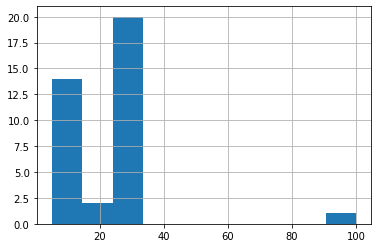

In [11]:
df['ceiling_height'].hist(range=(5, 100)) # построение гистограммы аномально больших значений высоты потолка

Сформируем вспомогательную таблицу с данными, где высота потолка в квартире больше 5 метров, чтобы подробнее изучить возникшие аномалии и выяснить их происхождение.

In [12]:
df.query('ceiling_height >= 5') # построение среза с информацией по квартирам, где потолок выше или равен 5 м.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3.0,NaN,1,False,False,False,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


По предварительному анализу видно, что можно выделить три группы аномалий. Первую группу со значениями высоты от 5 м. до 8.3 м. предлагаю оставить без изменений, поскольку единичные проекты с очень большими потолками имеют место быть. Во второй группе со значениями высоты от 25 (2.5 м.по строительным нормам минимальная высота потолка жилого помещения) до 32 м. скорее всего ошибка при заполнении, здесь можно откорректировать, поделив значение высоты на 10. 

In [13]:
df.loc[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32), 'ceiling_height'] = df['ceiling_height'] / 10 # корректировка аномальных значений
df.query('ceiling_height > 8.3') # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,False,False,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,False,False,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,False,False,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


С третьей группой, где есть значения высоты потолка 10.3, 14, 20, 22.6, 24, 100 м. сложнее всего. Со 100 м. предположу, что перепутали местами при заполнении данные по высоте и по общей площади квартиры (25 кв.м. выглядит неправдоподобно), поэтому здесь можно поменять местами значения высоты и общей площади, разделенной на 10. 

In [14]:
df.loc[df['ceiling_height'] == 100, 'ceiling_height'] = df['total_area'] / 10 # корректировка аномального значения
df.loc[22869, 'ceiling_height'] # проверка

2.5

Теперь можно переходить к обработке пропусков в столбце `ceiling_height` попутно обработав оставшиеся квартиры с аномально высокими потолками (больше 10 м.). Пропуски могли возникнуть из-за банального незнания этого параметра пользователем, но так как это достаточно типовая величина, можно её обработать.

Примем во внимание, что часто высота потолка в квартире зависит от количества этажей в доме (серии типовых домов). Поэтому заменим пропуски в таблице медианными значениями по столбцу `floors_total`. Следует также учесть, что в исходном датафрейме представлены дома с уникальным количеством этажей в единичном количестве, есть вероятность, что в таких домах возможны пропуски по высоте этажа и тогда замена медианным значением может не сработать. Поэтому воспользуемся вспомогательным срезом датафрейма (дома с уникальным количеством этажей в количестве больше 1).  

Выведем количество зданий с уникальными количествами этажей.

In [15]:
df['floors_total'].value_counts() # выод количества зданий с уникальными количествами этажей

5.0     5792
9.0     3766
16.0    1376
12.0    1368
4.0     1210
10.0    1177
25.0    1075
6.0      923
17.0     834
3.0      672
7.0      596
14.0     555
18.0     508
24.0     471
8.0      398
2.0      385
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     124
1.0       28
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Для вспомогательного датафрейма возьмем данные по зданиям, кроме 29, 33, 34, 37, 52, 60 этажей.

In [16]:
zf = df.query('floors_total != [29, 33, 34, 37, 52, 60]') # формирование вспомогательного среза
for value in zf['floors_total'].unique(): # формирование цикла по уникальным значениям количества этажей
    median = df.loc[df['floors_total'] == value, 'ceiling_height'].median() # расчет медианы для столбца 'ceiling_height'
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == value), 'ceiling_height'] = median # замена пропусков
    df.loc[(df['ceiling_height'] > 10) & (df['floors_total'] == value), 'ceiling_height'] = median # замена пропусков

In [17]:
df['ceiling_height'].isna().sum() # проверка

1

У нас остался один пропуск в столбце `ceiling_height`. Предлагаю заменить пропуск медианным значением по всей выборке.

In [18]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median() # замена пропуска медианным значением
df['ceiling_height'].isna().sum() # проверка

0

Приступим к обработке пропусков по площадям комнат, это столбцы `living_area` и `kitchen_area`. Здесь возможно несколько вариантов. Обычно значения по площадям комнат не пишут, когда в квартире присутствует свободная планировка, либо пишут значение только по одной из комнат. Рассмотрим эти варианты. Стоит помнить, что значения общей площади по всем квартирам нам известно.

Для начала проверим данные по столбцу `total_area`.

In [19]:
df['total_area'].describe() # проверка данных в столбце `total_area`

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Данные в порядке, присутствует некоторое количество больших значений, но квартиры с площадью до 900 кв.м. существуют, стоило бы напрячься, если бы значения по площади были существенно больше 1000 кв.м.

Также нам для дальнейших действий понадобиться опираться на значения количества комнат в квартире. Посмотрим на уникальные значения количества комнат.

In [20]:
df['rooms'].value_counts() # вывод количества квартир с уникальным значением количества комнат

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В исходном датафрейме присутствуют квартиры с количеством комнат 0. Это возможно при условии, что квартира представляет собой студию. Так как у нас в столбце `is_studio` отсутствуют пропуски, то можно провести проверку у скольких студий в количестве комнат указан 0.

In [21]:
df.loc[df['rooms'] == 0, 'is_studio'].value_counts() # вывод количества квартир-студий с количеством комнат 0

True     138
False     59
Name: is_studio, dtype: int64

В датафрейме присутствует 59 квартир не студий, у которых указано количество комнат 0. Это больше похоже на некорректное заполнение таблицы собственником. Заменим эти значения на 1.

In [22]:
df.loc[(df['rooms'] == 0) & (df['is_studio'] == False), 'rooms'] = 1 # корректировка аномального значения
print(df.loc[df['rooms'] == 0, 'is_studio'].value_counts()) # проверка
df['rooms'].value_counts() # проверка

True    138
Name: is_studio, dtype: int64


1     8106
2     7940
3     5814
4     1180
5      326
0      138
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Перейдем к рассмотрению вариантов.

* Вариант, когда в квартире отстутствуют данные по площадям кухни и жилой комнаты.

Здесь можно заменить пропуски медианными значениями площадей комнат в зависимоти от их количества. Но для начала определим сколько пропущенных значений в столбце `kitchen_area_area` имеется в квартирах-студиях с количеством комнат 0.

In [23]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'kitchen_area'].isna().sum() # вывод количества квартир-студий 
# с количеством комнат 0 с пропусками значений площади кухни 

138

Так как в студиях как правило нет четкого разделения на кухню и жилую зону, примем что площадь кухни равна жилой площади. Для этого проверим количество пропущенных значений в столбце `living_area` в квартирах-студиях с количеством комнат 0.

In [24]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'living_area'].isna().sum() # вывод количества квартир-студий 
# с количеством комнат 0 с пропусками значений площади жилой комнаты 

10

Таких квартир всего 10, оставим это пока, как есть. Обработаем эти значения на последующих этапах, а пока проведем запланированную замену.

In [25]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 
       'kitchen_area'] = df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'living_area'] # замена пропусков
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'kitchen_area'].isna().sum() # проверка

10

Теперь можно заменить пропуски медианными значениями с учетом количества комнат.

In [26]:
for value in df['rooms'].unique(): # формирование цикла по уникальным значениям количества комнат
    median_1 = df.loc[(df['rooms'] == value), 'living_area'].median() # расчет медианы для столбца 'living_area'
    median_2 = df.loc[(df['rooms'] == value), 'kitchen_area'].median() # расчет медианы для столбца 'kitchen_area'
    df.loc[(df['living_area'].isna()) & (df['rooms'] == value), 'living_area'] = median_1 # замена пропусков
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == value), 'kitchen_area'] = median_2 # замена пропусков

In [27]:
print('Количество пропусков в столбце \'living_area\' составляет:', df['living_area'].isna().sum()) # проверка
print('Количество пропусков в столбце \'kitchen_area\' составляет:', df['kitchen_area'].isna().sum()) # проверка

Количество пропусков в столбце 'living_area' составляет: 0
Количество пропусков в столбце 'kitchen_area' составляет: 0


Перейдем к обработке пропущенных значений в столбце `is_apartment`. Выведем уникальные значения этого столбца.

In [28]:
df['is_apartment'].value_counts() # вывод уникальных значений столбца 'is_apartment'

False    2725
True       50
Name: is_apartment, dtype: int64

Как мы видим, данные об апартаментах предоставлены по небольшому количеству объектов. Это может быть связано с тем, что при заполнении таблицы эти данные были внесены автоматически, также при выведении общей информации по таблице эти значения записаны с некорректным типом 'object' вместо 'bool'. Оставим пока эти пропуски без изменений.

Приступим к обработке пропущенных значений в столбце `balcony`. Выведем уникальные значения этого столбца.

In [29]:
df['balcony'].value_counts() # вывод уникальных значений столбца 'balcony'

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Здесь скорее всего пропущены значения там, где балконов нет. Логично заменить пропуски нулями.

In [30]:
df.loc[(df['balcony'].isna()), 'balcony'] = 0 # замена пропусков
print('Количество пропусков в столбце \'balcony\' составляет:', df['balcony'].isna().sum()) # проверка

Количество пропусков в столбце 'balcony' составляет: 0


Перейдем к обработке пропущенных значений в столбце `locality_name`.
У нас в исходном датафрейме присутствует 49 пропущенных значений по местоположению. Скорее всего это могло произойти при импорте данных со сторонних сервисов. Но у нас есть значения расстояний до аэропорта и до ближайшего центра города, этого должно быть достаточно для заполнения пропущенных значений.

Для начала посмотрим на строки, где пропущены значения в столбцах `locality_name`, `airports_nearest`, `city_center_nearest`.

In [31]:
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'].isna()) & (df['airports_nearest'].isna())] # вывод строк 
# с пропущенными значениями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,3.00,4.0,42.6,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,3.00,4.0,25.8,3,False,False,False,9.04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.55,9.0,45.0,2,False,False,False,9.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.55,5.0,47.3,2,NaN,False,False,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,NaN,False,False,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.55,9.0,30.5,2,False,False,False,29.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.55,9.0,36.6,2,False,False,False,29.70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,False,False,False,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


В этих строках также отсутствуют остальные данные по местоположению. Их всего 8, сильно на анализ данных они не повлияют. Удалим эти строки. 

In [32]:
df = df.dropna(how='all', subset=['locality_name', 'airports_nearest', 'city_center_nearest']).reset_index(drop=True) # удаление строк 
# с переназначением индексов
df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23691 non-null  int64  
 1   last_price            23691 non-null  float64
 2   total_area            23691 non-null  float64
 3   first_day_exposition  23691 non-null  object 
 4   rooms                 23691 non-null  int64  
 5   ceiling_height        23691 non-null  float64
 6   floors_total          23691 non-null  float64
 7   living_area           23691 non-null  float64
 8   floor                 23691 non-null  int64  
 9   is_apartment          2770 non-null   object 
 10  is_studio             23691 non-null  bool   
 11  is_open_plan          23691 non-null  bool   
 12  kitchen_area          23691 non-null  float64
 13  balcony               23691 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сгруппируем данные в таблице с отсутсвующим местоположением по расстояниям до ближайшего центра города.

In [33]:
df.loc[df['locality_name'].isna()].groupby('city_center_nearest').agg({'city_center_nearest':'count'}) # группировка по расстоянию 
# до ближайшего центра города

,city_center_nearest
city_center_nearest,
1322.0,1
1780.0,1
3039.0,1
3312.0,1
3801.0,1
3902.0,1
4065.0,1
4069.0,1
4258.0,2


Сгруппируем полученные значения в группы с шагом 500 - 2500 м. по следующему принципу:

* 0–2000 — 'A';
* 3000–5500 — 'B';
* 8000–10000 — 'C';
* 10500–12500 — 'D';
* 16500-17500 — 'E';
* 23500-24000 — 'F';
* 31500-32000 — 'G';
* 41000-41500 — 'H';
* для остальных — 'I'.

Для начала составим функцию.

In [34]:
def distance_group(distance): # возвращает соответствующую дистанции группу
    if distance <= 3000:
        return 'A'
    if distance >= 3000 and distance <= 5500:
        return 'B'
    if distance >= 8000 and distance <= 10000:
        return 'C'
    if distance >= 10500 and distance <= 12500:
        return 'D'
    if distance >= 16500 and distance <= 17500:
        return 'E'
    if distance >= 23500 and distance <= 24000:
        return 'F'
    if distance >= 31500 and distance <= 32000:
        return 'G'
    if distance >= 41000 and distance <= 41500:
        return 'H'
    return 'I'

Создадим новый столбец `distance_category`.

In [35]:
df['distance_category'] = df['city_center_nearest'].apply(distance_group) # создание нового столбца
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,distance_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,I
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,I
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,I
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,I
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,C


Проверим получившиеся группы на уникальные названия населенных пунктов.

In [36]:
df[df['distance_category'] == 'A']['locality_name'].unique() # проверка группы 'A' на уникальные названия населенных пунктов

array(['Санкт-Петербург', nan], dtype=object)

In [37]:
df[df['distance_category'] == 'B']['locality_name'].unique() # проверка группы 'B' на уникальные названия населенных пунктов

array(['Санкт-Петербург', nan], dtype=object)

In [38]:
df[df['distance_category'] == 'C']['locality_name'].unique() # проверка группы 'C' на уникальные названия населенных пунктов

array(['Санкт-Петербург', nan], dtype=object)

In [39]:
df[df['distance_category'] == 'D']['locality_name'].unique() # проверка группы 'D' на уникальные названия населенных пунктов

array(['Санкт-Петербург', nan], dtype=object)

В группах A-D смело можно заменять пропущенные значения на 'Санкт-Петербург'.

In [40]:
df[df['distance_category'] == 'E']['locality_name'].unique() # проверка группы 'E' на уникальные названия населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', nan], dtype=object)

Кроме 'Санкт-Петербурга' появилось еще уникальное значение 'посёлок Шушары'. Выведем на экран минимальное и максимальное расстояние до аэропорта по этому уникальному значению и по пропущенным, это позволит определить более точно местоположение пропущенных значений.

In [41]:
ef = df[df['distance_category'] == 'E'] # сформируем вспомогательный датафрейм
print('пропущенные значения:', min(ef[ef['locality_name'].isna()]['airports_nearest']), max(ef[ef['locality_name'].isna()]['airports_nearest']))
print('посёлок Шушары:', min(ef[ef['locality_name'] == 'посёлок Шушары']['airports_nearest']), max(ef[ef['locality_name'] == 'посёлок Шушары']['airports_nearest']))

пропущенные значения: 21460.0 22041.0
посёлок Шушары: 11226.0 11858.0


В группе E также можно заменять пропущенные значения на 'Санкт-Петербург'.

In [42]:
df[df['distance_category'] == 'F']['locality_name'].unique() # проверка группы 'F' на уникальные названия населенных пунктов

array(['посёлок Парголово', 'Санкт-Петербург', 'посёлок Шушары',
       'посёлок Стрельна', nan], dtype=object)

Кроме 'Санкт-Петербурга' появились еще уникальные значения 'посёлок Шушары', 'посёлок Парголово', 'посёлок Стрельна'. Выведем на экран минимальное и максимальное расстояние до аэропорта по этим уникальным значениям и по пропущенным, это позволит определить более точно местоположение пропущенных значений.

In [43]:
ff = df[df['distance_category'] == 'F'] # сформируем вспомогательный датафрейм
print('пропущенные значения:', min(ff[ff['locality_name'].isna()]['airports_nearest']), max(ff[ff['locality_name'].isna()]['airports_nearest']))
print('посёлок Шушары:', min(ff[ff['locality_name'] == 'посёлок Шушары']['airports_nearest']), max(ff[ff['locality_name'] == 'посёлок Шушары']['airports_nearest']))
print('посёлок Парголово:', min(ff[ff['locality_name'] == 'посёлок Парголово']['airports_nearest']), max(ff[ff['locality_name'] == 'посёлок Парголово']['airports_nearest']))
print('посёлок Стрельна:', min(ff[ff['locality_name'] == 'посёлок Стрельна']['airports_nearest']), max(ff[ff['locality_name'] == 'посёлок Стрельна']['airports_nearest']))

пропущенные значения: 20234.0 20234.0
посёлок Шушары: 17766.0 18055.0
посёлок Парголово: 53696.0 54061.0
посёлок Стрельна: 26770.0 28612.0


В группе F также можно заменять пропущенные значения на 'Санкт-Петербург'.

In [44]:
df[df['distance_category'] == 'G']['locality_name'].unique() # проверка группы 'G' на уникальные названия населенных пунктов

array(['Павловск', 'Колпино', 'посёлок Шушары', 'Пушкин', 'Петергоф', nan,
       'посёлок Понтонный'], dtype=object)

Здесь же появились уникальные значения 'Пушкин', 'Петергоф', 'посёлок Шушары', 'Павловск', 'Колпино', 'посёлок Понтонный'. Выведем на экран минимальное и максимальное расстояние до аэропорта по этим уникальным значениям и по пропущенным, это позволит определить более точно местоположение пропущенных значений.

In [45]:
gf = df[df['distance_category'] == 'G'] # сформируем вспомогательный датафрейм
print('пропущенные значения:', min(gf[gf['locality_name'].isna()]['airports_nearest']), max(gf[gf['locality_name'].isna()]['airports_nearest']))
print('Пушкин:', min(gf[gf['locality_name'] == 'Пушкин']['airports_nearest']), max(gf[gf['locality_name'] == 'Пушкин']['airports_nearest']))
print('Петергоф:', min(gf[gf['locality_name'] == 'Петергоф']['airports_nearest']), max(gf[gf['locality_name'] == 'Петергоф']['airports_nearest']))
print('посёлок Шушары:', min(gf[gf['locality_name'] == 'посёлок Шушары']['airports_nearest']), max(gf[gf['locality_name'] == 'посёлок Шушары']['airports_nearest']))
print('Павловск:', min(gf[gf['locality_name'] == 'Павловск']['airports_nearest']), max(gf[gf['locality_name'] == 'Павловск']['airports_nearest']))
print('Колпино:', min(gf[gf['locality_name'] == 'Колпино']['airports_nearest']), max(gf[gf['locality_name'] == 'Колпино']['airports_nearest']))
print('посёлок Понтонный:', min(gf[gf['locality_name'] == 'посёлок Понтонный']['airports_nearest']), max(gf[gf['locality_name'] == 'посёлок Понтонный']['airports_nearest']))

пропущенные значения: 19659.0 19744.0
Пушкин: 16282.0 19760.0
Петергоф: 36382.0 36796.0
посёлок Шушары: 17472.0 26202.0
Павловск: 19380.0 19775.0
Колпино: 25724.0 26196.0
посёлок Понтонный: 30087.0 30087.0


В группе G можно заменять пропущенные значения на 'Пушкин'.

In [46]:
df[df['distance_category'] == 'H']['locality_name'].unique() # проверка группы 'H' на уникальные названия населенных пунктов

array(['Красное Село', nan], dtype=object)

В группе H можно заменять пропущенные значения на 'Красное Село'.

Приступим к заменам пропущенных значений в столбце `locality_name`.

In [47]:
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] <= 24000), 'locality_name'] = 'Санкт-Петербург' # замена
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] >= 31500) & (df['city_center_nearest'] <= 32000), 'locality_name'] = 'Пушкин' # замена
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] >= 41000), 'locality_name'] = 'Красное Село' # замена
df['locality_name'].isna().sum() # проверка

0

Теперь можно удалить вспомогательный столбец `distance_category`, чтобы не перегружать таблицу.

In [48]:
df = df.drop(columns='distance_category') # удаление столбца 'distance_category'
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Далее нам необходимо разобраться с названиями населенных пунктов. Выведем на экран уникальные названия столбца `locality_name`.

In [49]:
df['locality_name'].unique() # вывод уникальных значений столбца 'locality_name'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [50]:
len(df['locality_name'].unique()) # вывод количества уникальных значений столбца 'locality_name'

364

Первоначальный анализ показал, что присутствуют такие проблемы, как использование буквы 'ё', разное написание типов населенных пунктов. Постараемся исправить эти проблемы.

In [51]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # замена 'ё' на 'е'
len(df['locality_name'].unique()) # проверка

330

Теперь составим список населенных пунктов, содержащих слово 'поселок', чтобы посмотреть какие типы поселков у нас есть.

In [52]:
spisok = [] # создание пустого списка
for value in df['locality_name'].unique(): # формирование цикла по уникальным значениям местоположения
    if 'поселок' in value: # поиск значений местоположений, содержащих слово 'поселок' 
        spisok.append(value) # добавление этих значений в список
print(spisok) # вывод списка на экран

['поселок Шушары', 'городской поселок Янино-1', 'поселок Парголово', 'поселок Мурино', 'поселок городского типа Красный Бор', 'поселок Металлострой', 'поселок городского типа Лебяжье', 'поселок городского типа Сиверский', 'поселок Молодцово', 'поселок городского типа Кузьмоловский', 'поселок Аннино', 'поселок городского типа Ефимовский', 'поселок Плодовое', 'поселок Торковичи', 'поселок Первомайское', 'поселок Понтонный', 'поселок Новый Свет', 'поселок Романовка', 'поселок Бугры', 'поселок городского типа Рощино', 'поселок Оредеж', 'поселок Молодежное', 'поселок Победа', 'поселок городского типа Синявино', 'поселок Стрельна', 'поселок Александровская', 'поселок Терволово', 'поселок городского типа Советский', 'поселок Петровское', 'поселок городского типа Токсово', 'поселок Сельцо', 'поселок городского типа Вырица', 'поселок Тельмана', 'поселок Севастьяново', 'городской поселок Большая Ижора', 'городской поселок Павлово', 'поселок Новогорелово', 'городской поселок Лесогорский', 'посело

У нас есть 'городской поселок', 'поселок городского типа', 'поселок станции', 'поселок при железнодорожной станции', 'коттеджный поселок'. Заменим эти названия на просто 'поселок'.

In [53]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок') # замена 
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок') # замена
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок') # замена
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок') # замена
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок') # замена
len(df['locality_name'].unique()) # проверка

318

Также было замечено разное написание в садовых товариществах. Присутствуют варианты 'садовое товарищество' и 'садовое некоммерческое товарищество'. Исправим и это.

In [54]:
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество') # замена 
df['locality_name'].unique() # проверка

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Можно переходить к обработке пропусков в оставшихся столбцах с информацией по местоположению.
Проверим гипотезу, что данные по этим столбцам отсутствуют в конкретных населенных пунктах. выведем н экран  первые пять строк таблицы, которая содержит пропуски по столбцам `city_center_nearest`, `parks_around_3km` и `ponds_around_3km` (были выбраны эти столбцы из-за схожего количества пропусков) и количество строк, удовлетворяющих этим условиям.

In [55]:
display(df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'].isna()) 
               & (df['ponds_around_3km'].isna())].head()) # вывод таблицы с пропусками
len(df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'].isna()) 
           & (df['ponds_around_3km'].isna())]) # вывод количества квартир с пропусками в данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,NaN,False,False,9.04,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


5510

Можно сделать предварительный вывод, что в 5510 строках датафрейма также отсутствуют данные и по столбцам `airports_nearest`, `parks_nearest` и `ponds_nearest`.
Для начала обработаем пропуски в столбцах `parks_nearest` и  `parks_around_3km`. Скорее всего при нулевом количестве парков в радиусе 3 км расстояние до ближайшего парка записано пропуском. То же справедливо и для столбцов `ponds_nearest` и `ponds_around_3km`.

In [56]:
df.loc[(df['parks_nearest'].isna()) & (df['parks_around_3km'] == 0), 'parks_nearest'] = 0 # замена пропусков в столбце 'parks_nearest' нулями
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around_3km'] == 0), 'ponds_nearest'] = 0 # замена пропусков в столбце 'ponds_nearest' нулями
print('Количество пропусков в столбце \'parks_nearest\':', df['parks_nearest'].isna().sum()) # проверка
print('Количество пропусков в столбце \'ponds_nearest\':', df['ponds_nearest'].isna().sum()) # проверка

Количество пропусков в столбце 'parks_nearest': 5510
Количество пропусков в столбце 'ponds_nearest': 5510


Попробуем обработать пропуски во всех этих столбцах, есть вероятность, что среди названий населенных пунктов есть не только поселки и деревни, возможно присутствуют и большие города. Тогда можно попробовать заменить пропущенные значения по расстояниям, медианным значением. Попробуем ради примера вызвать на экран список уникальных значений столбца `airports_nearest` из таблицы с пропусками по столбцу `city_center_nearest` в Санкт-Петербурге.

In [57]:
df.loc[(df['city_center_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург')]['airports_nearest'].unique() # вывод уникальных значений

array([nan])

Здесь можно сделать вывод, что замена пропущенных значений по расстояниям, медианным значением по населенному пункту не получится, так как сильно исказится выборка результатов в ходе анализа данных. Придется оставить эти пропуски 'как есть'.

Выведем на экран количество пропусков в столбцах `airports_nearest` и `city_center_nearest`.

In [58]:
print('Количество пропусков в столбце \'airports_nearest\':', df['airports_nearest'].isna().sum())
print('Количество пропусков в столбце \'city_center_nearest\':', df['city_center_nearest'].isna().sum())

Количество пропусков в столбце 'airports_nearest': 5534
Количество пропусков в столбце 'city_center_nearest': 5511


У нас есть 5510 строк, которые остаются без изменений. Осталось выяснить, что делать с 1 строкой с пропущенным значением в столбце `city_center_nearest` и 24 строками с пропущенными значениями в столбце `airports_nearest`.

Здесь можно заменить соответствующим медианным значением по населенному пункту.

In [59]:
df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'] > 0), 'locality_name'] # вывод значения населенного пункта

20187    Пушкин
Name: locality_name, dtype: object

In [60]:
df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'] > 0), 
       'city_center_nearest'] = df.loc[(df['locality_name'] == 'Пушкин'), 'city_center_nearest'].median() # замена
print('Количество пропусков в столбце \'city_center_nearest\':', df['city_center_nearest'].isna().sum()) # проверка

Количество пропусков в столбце 'city_center_nearest': 5510


Выведем значения населенных пунктов, где пропущены только значения в столбце `airports_nearest`.

In [61]:
df.loc[(df['airports_nearest'].isna()) & (df['city_center_nearest'] > 0), 'locality_name'].unique() # вывод уникальных значений

array(['Санкт-Петербург'], dtype=object)

Заменим соответствующим медианным значением по населенному пункту.

In [62]:
df.loc[(df['airports_nearest'].isna()) & (df['city_center_nearest'] > 0), 
       'airports_nearest'] = df.loc[(df['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'].median() # замена
print('Количество пропусков в столбце \'airports_nearest\':', df['airports_nearest'].isna().sum()) # проверка

Количество пропусков в столбце 'airports_nearest': 5510


У нас остались пропуски в столбце `days_exposition`. Их появление логичнее всего объяснить тем фактом, что данные квартиры до сих пор находятся в продаже. Пока оставим пропуски без изменений.

Выведем общее количество пропусков в таблице.

In [63]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20921
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5510
city_center_nearest      5510
parks_around_3km         5510
parks_nearest            5510
ponds_around_3km         5510
ponds_nearest            5510
days_exposition          3180
dtype: int64

### Удаление дубликатов

Проверим датафрейм на наличие дубликатов.

In [64]:
df.duplicated().sum() # проверка датафрейма на дубликаты

0

Дубликаты в таблице отсутствуют.

### Изменение типов данных

Приступим к изменению типа данных в датафрейме. Выведем еще раз общую информацию по таблице.

In [65]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23691 non-null  int64  
 1   last_price            23691 non-null  float64
 2   total_area            23691 non-null  float64
 3   first_day_exposition  23691 non-null  object 
 4   rooms                 23691 non-null  int64  
 5   ceiling_height        23691 non-null  float64
 6   floors_total          23691 non-null  float64
 7   living_area           23691 non-null  float64
 8   floor                 23691 non-null  int64  
 9   is_apartment          2770 non-null   object 
 10  is_studio             23691 non-null  bool   
 11  is_open_plan          23691 non-null  bool   
 12  kitchen_area          23691 non-null  float64
 13  balcony               23691 non-null  float64
 14  locality_name         23691 non-null  object 
 15  airports_nearest   

Значения даты и времени в столбце `first_day_exposition` записано в формате ISO и имеет числовой тип данных. Для удобства дальнейших действий с данными, исправим это. Также избавимся от значений времени, в дальнейшем нам понадобятся только значения даты.

In [66]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d') # форматирование столбца'first_day_exposition'
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Значения столбцов `floors_total`, `balcony` записано в формате 'float64', что не совсем корректно, исправим это.

In [67]:
df['floors_total'] = df['floors_total'].astype('int') # замена вещественного типа данных на целочисленный
df['balcony'] = df['balcony'].astype('int') # замена вещественного типа данных на целочисленный
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


После заполнения пропусков в столбцах `living_area` и `kitchen_area` значения стали отображаться с 6 знаками после запятой, для лучшей читаемости таблицы округлим значения до одного знака после запятой

In [68]:
df['living_area'] = round(df['living_area'], 1) # округление значений до одного знака после запятой
df['kitchen_area'] = round(df['kitchen_area'], 1) # округление значений до одного знака после запятой
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


При обработке пропусков мы обращали внимание на столбец `is_apartment`. Оказалось, что у значений в этом столбце некорректный тип. Попробуем исправить это. Однако, если мы просто поменяем тип данных, то все пропуски автоматически поменются на True, что может исказить данные. Как правило, в небольших населённых пунктах апартаменты не распространены. Попробуем выяснить количество объектов, расположенных в деревнях, поселках, селах и садовых товариществах, где отсутствуют данные по столбцу `is_apartment`.

In [69]:
spisok = 0 # создание пустого списка
for value in df.loc[df['is_apartment'].isna(), 'locality_name']: # создание цикла-счетчика, перебирающего значения названий населенных пунктов, где присутствуют ключевые слова
    if 'поселок' in value:
        spisok += 1
    elif 'село' in value:
        spisok += 1
    elif 'деревня' in value:
        spisok += 1
    elif 'садовое товарищество' in value:
        spisok += 1
print('Количество объектов в маленьких населенных пунктах с пропусками в столбце \'is_apartment\':', spisok)
print('Доля объектов в маленьких населенных пунктах с пропусками в столбце \'is_apartment\':', round((spisok / len(df['locality_name'])) * 100, 2), '%')

Количество объектов в маленьких населенных пунктах с пропусками в столбце 'is_apartment': 3235
Доля объектов в маленьких населенных пунктах с пропусками в столбце 'is_apartment': 13.65 %


По информации из открытых источников, в 2021 году в Санкт-Петербурге на долю апартаментов приходилось 7 % из всех сделок с жилой недвижимость. Даже учитывая этот факт, мы все равно не сможем автоматически поменять тип данных. Логичнее всего поменять пропуски на False. 

In [70]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False # замена пропусков в столбце 'is_apartment' 
df['is_apartment'].value_counts() # проверка

False    23641
True        50
Name: is_apartment, dtype: int64

Теперь можно заменить тип данных на корректный.

In [71]:
df['is_apartment'] = df['is_apartment'].astype('bool') # замена вещественного типа данных на булев
df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23691 non-null  int64         
 1   last_price            23691 non-null  float64       
 2   total_area            23691 non-null  float64       
 3   first_day_exposition  23691 non-null  datetime64[ns]
 4   rooms                 23691 non-null  int64         
 5   ceiling_height        23691 non-null  float64       
 6   floors_total          23691 non-null  int64         
 7   living_area           23691 non-null  float64       
 8   floor                 23691 non-null  int64         
 9   is_apartment          23691 non-null  bool          
 10  is_studio             23691 non-null  bool          
 11  is_open_plan          23691 non-null  bool          
 12  kitchen_area          23691 non-null  float64       
 13  balcony         

### Вывод

Предобработка выявила несколько проблем в данных. Наличие пропусков в данных, которые обусловлены 'человеческим фактором' и автоматическим импортом с других источников, некорректные типы данных. 

Исправив проблемы, упростили работу с таблицей, что в дальнейшем поможет сделать исследование более точным.

## Расчёты и добавление результатов в таблицу

Сформируем новый столбец `sq_m_price`, в котором будет рассчитана цена квадратного метра каждого объекта.

In [72]:
df['sq_m_price'] = round(df['last_price'] / df['total_area'], 2) # добавление нового столбца с расчетом цены квадратного метра
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


Сформируем новые столбцы:
* `weekday_exposition`, в котором будет указан день недели публикации объявления;
* `month_exposition`, в котором будет указан месяц публикации объявления;
* `year_exposition`, в котором будет указан год публикации объявления.

In [73]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday # добавление нового столбца с днем недели публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month # добавление нового столбца с месяцем публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year # добавление нового столбца с годом публикации объявления
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [74]:
df['weekday_exposition'].value_counts() # вывод уникальных значений столбца 'weekday_exposition', дополнительная проверка

3    4294
1    4181
4    4000
2    3974
0    3608
5    1935
6    1699
Name: weekday_exposition, dtype: int64

Сформируем новый столбец `floor_type`, в котором будет указан тип этажа объекта 'первый', 'последний' или 'другой'.

In [75]:
df.loc[df['floor'] == 1, 'floor_type'] = 'первый' # добавление нового столбца, где указан тип этажа 'первый'
df.loc[(df['floor'] > 1) & (df['floor'] == df['floors_total']), 'floor_type'] = 'последний' # добавление нового столбца, где указан тип этажа 'последний'
df.loc[df['floor_type'].isna(), 'floor_type'] = 'другой' # добавление нового столбца, где указан тип этажа 'другой'
df['floor_type'].value_counts() # проверка

другой       17355
последний     3419
первый        2917
Name: floor_type, dtype: int64

Сформируем новые столбцы `living_ratio` и `kitchen_ratio`, в котором будут указаны соотношение жилой площади к общей и соотношение площади кухни к общей.

In [76]:
df['living_ratio'] = round(df['living_area'] / df['total_area'], 2) # добавление нового столбца с расчетом соотношения жилой площади к общей
df['kitchen_ratio'] = round(df['kitchen_area'] / df['total_area'], 2) # добавление нового столбца с расчетом соотношения площади кухни к общей
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.28,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41


### Вывод

Мы добавили дополнительные столбцы с ключевыми параметрами, которые помогут нам с последующим анализом данных.

## Исследовательский анализ данных

### Изучение параметров: площади, цены, числа комнат и высоты потолков квартир

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.
Для начала построим гистограммы по каждому из параметров.

Начнем с `площади квартир`.

<AxesSubplot:>

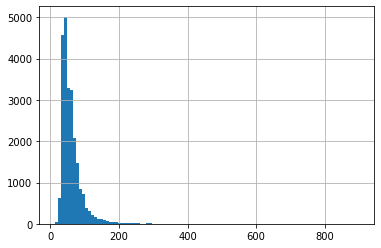

In [77]:
df['total_area'].hist(bins=100) # построение гистограммы по общей площади квартир

Первоначально можно сделать вывод, что ориентировочно до 200 кв.м. распределение данных близко к нормальному, но есть выбросы с большими значениями, изучим их.

In [78]:
df['total_area'].describe() # вывод характерных значений по данным

count    23691.000000
mean        60.346202
std         35.658589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры составляет 12 кв.м, максимальная площадь 900 кв.м., среднее значение 60.34 кв.м., медианное значение 52 кв.м.

Построим гистограмму максимальных значений.

<AxesSubplot:>

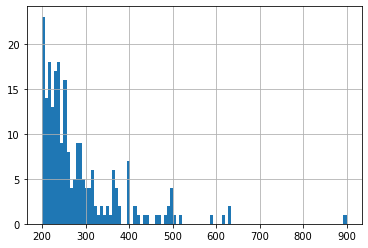

In [79]:
df['total_area'].hist(bins=100, range=(200, 900)) # построение гистограммы общей площади больших квартир в диапазоне от 200 до 900 кв.м.

Построим диаграмму размаха.

(0.0, 200.0)

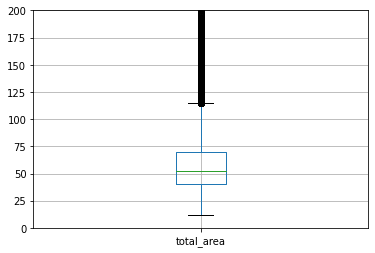

In [80]:
df.boxplot(column='total_area') # построение диаграммы размаха
plt.ylim(0, 200) # изменение масштаба вертикальной оси

Уточним, что ориентировочно до 115 кв.м. распределение данных близко к нормальному, свыше 115 кв.м. в таблице присутствуют выбросы.

Мы посмотрели на характерные значения по данным общей площади, заметили, что в таблице присутствуют квартиры с очень большими площадями и отметили квартиры с маленькими площадями (12 кв.м.). Наибольшее число квартир в продаже с общей площадью 52 кв.м.

Изучим `стоимости квартир`.

<AxesSubplot:>

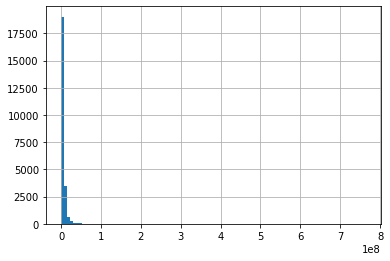

In [81]:
df['last_price'].hist(bins=100) # построение гистограммы по стоимости квартир

Гистограмма получилась неиформативная. Выведем характерные значения по данным стоимости квартир.

In [82]:
df['last_price'].describe() # вывод характерных значений по данным

count    2.369100e+04
mean     6.542278e+06
std      1.088874e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная стоимость квартиры составляет 121.9 тыс., максимальная 7.63 млрд., среднее значение 6.54 млн., медианное 4.65 млн. Есть очень дорогие объекты, значение стандартного отклонения аномально высокое. Посмотрим сначала на диапазон от 0 до 20 млн., от 20 млн. до 1 млрд., затем от 1 млрд. и выше.

<AxesSubplot:>

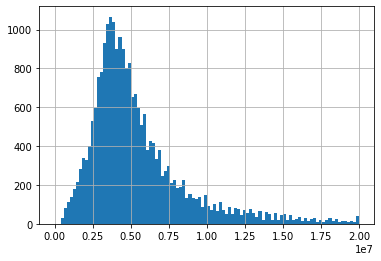

In [83]:
df['last_price'].hist(bins=100, range=(0, 20000000)) # построение гистограммы по стоимости квартирв диапазоне от 0 до 20 млн.

<AxesSubplot:>

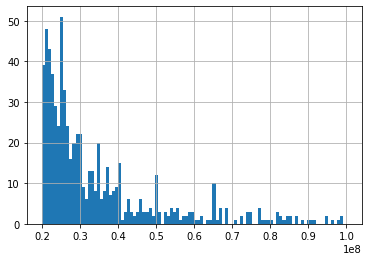

In [84]:
df['last_price'].hist(bins=100, range=(20000000, 100000000)) # построение гистограммы по стоимости квартир в диапазоне от 20 млн. до 1 млрд.

<AxesSubplot:>

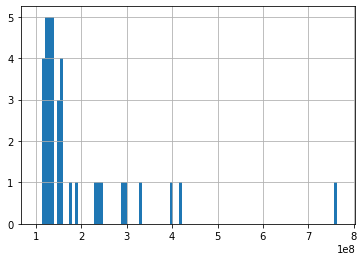

In [85]:
    df['last_price'].hist(bins=100, range=(100000000, 770000000)) # построение гистограммы стоимости квартир в диапазоне от 1 млрд. до 7.7 млрд.

Построим диаграмму размаха.

(0.0, 12500000.0)

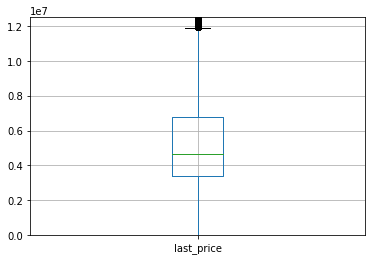

In [86]:
df.boxplot(column='last_price') # построение диаграммы размаха
plt.ylim(0, 12500000) # изменение масштаба вертикальной оси

Анализ данных показал, что наибольшее число квартир продается за цену 4.65 млн. и что распределение данных по стоимости имеет после стоимости ориентировочно в 1.2 млрд. сильный выброс в сторону аномально больших значений. 

Изучим `число комнат`.

<AxesSubplot:>

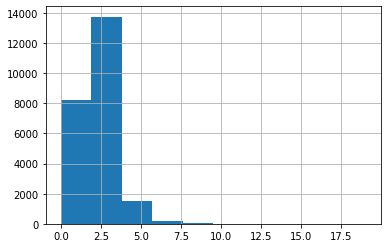

In [87]:
df['rooms'].hist() # построение гистограммы по стоимости квартир

Выведем характерные значения распределения.

In [88]:
df['rooms'].describe() # вывод характерных значений по данным

count    23691.000000
mean         2.073108
std          1.074855
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Минимальное количество комнат составляет 1, максимальное 19, среднее значение 2.07, медианное 2.

Посмотрим гистограммы в диапазоне от 0 до 10 комнат и от 10 и выше, а также построим диаграмму размаха.

<AxesSubplot:>

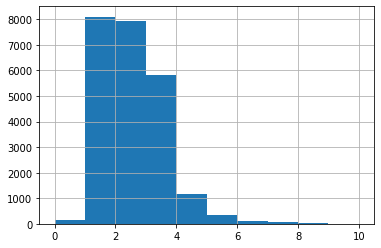

In [89]:
df['rooms'].hist(range=(0, 10)) # построение гистограммы по количеству комнат в диапазоне от 0 до 10

<AxesSubplot:>

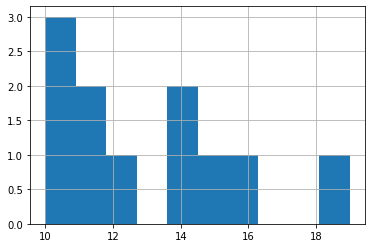

In [90]:
df['rooms'].hist(range=(10, 19)) # построение гистограммы по количеству комнат в диапазоне 10 до 19

<AxesSubplot:>

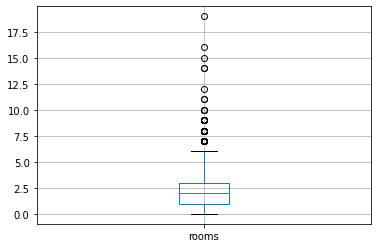

In [91]:
df.boxplot(column='rooms') # построение диаграммы размаха

Анализ данных показал, что наибольшее число квартир в продаже имеет количество комнат 2. Также у нас есть чемпионы с количеством комнат больше 10. Имеются выбросы от 6 комнат.

Изучим `высоту потолков`.

<AxesSubplot:>

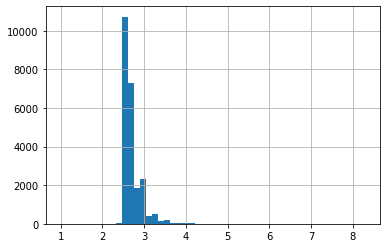

In [92]:
df['ceiling_height'].hist(bins=50) # построение гистограммы по высоте потолка

Выведем характерные значения распределения.

In [93]:
df['ceiling_height'].describe() # вывод характерных значений по данным

count    23691.000000
mean         2.708861
std          0.245626
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолка 1 м., максимальное 8.3 м., среднее значение 2.7 м., медианное 2.65 м.

Построим диаграмму размаха.

(2.0, 4.0)

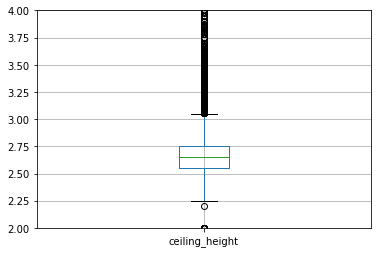

In [94]:
df.boxplot(column='ceiling_height') # построение диаграммы размаха
plt.ylim(2, 4)  # изменение масштаба вертикальной оси

Анализ данных показал, что наибольшее число квартир в продаже имеет высоту потолков 2.65 м. Но есть аномально низкие значения в диапазоне от 1 до 2.5 м.(минимальная высота потолков в жилых помещениях по строительным нормам), также есть квартиры с высокими потолками. Также присутствуют выбросы ниже 2.25 м. и выше 3.05 м.

### Изучение времени продажи квартир

Приступим к изучению времени продажи квартир. Для начала выведем хактерные значения по столбцу `days_exposition` и построим гистограмму.

In [95]:
df['days_exposition'].describe() # вывод характерных значений по данным

count    20511.000000
mean       180.909561
std        219.759659
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное значение продажи составляет 1 день, максимальное 1580 дней, среднее значение 180.91 дней, медианное 95 дней.

Построим гистограмму.

<AxesSubplot:>

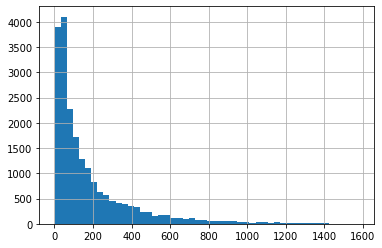

In [96]:
df['days_exposition'].hist(bins=50) # построение гистограммы времени продажи квартир

In [97]:
print('Среднее время продажи квартиры составляет:', round(df['days_exposition'].mean(), 2), 'дней')
print('Медиана по значению времени продажи квартиры составляет:', df['days_exposition'].median(), 'дней')

Среднее время продажи квартиры составляет: 180.91 дней
Медиана по значению времени продажи квартиры составляет: 95.0 дней


Обычно продажа квартиры занимает 95 дней (это значение хорошо характеризирует медиана). Можно сказать, что продажа прошла быстро, если время продажи заняло от 1 до 180 дней. Необычно долгое время продажи от 180 дней и выше.

Однако присутствуют квартиры с необычайно долгим временем экспонирования. Максимальное время продажи 1580 дней, это 4 года и почти 4 месяца. Здесь стоит помнить, что по времени продажи в исходном датафрейме присутствуют пропуски и мы договорились считать, что эти квартиры не проданы.

(0.0, 600.0)

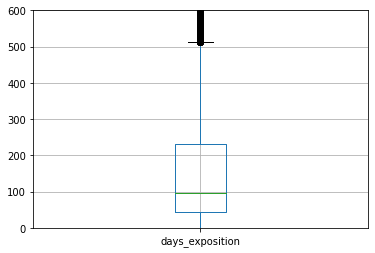

In [98]:
df.boxplot(column='days_exposition') # построение диаграммы размаха
plt.ylim(0, 600) # изменение масштаба вертикальной оси

Выведем характерные значения выборки, в котором будут только нормальные значения, без выбросов. Выбросы начинаются с ориентировочного значения в 510 дней.

In [99]:
df.loc[(df['days_exposition'] <= 510), 'days_exposition'].describe() # вывод характерных значений выборки 

count    18832.000000
mean       128.554057
std        121.259680
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        510.000000
Name: days_exposition, dtype: float64

Мы можем заметить, что характерные значения в выборке изменились в сторону уменьшения:

Медиана была 95 дней, стала 85 дней.

Среднее значение было 180.91 дней, стало 128.55 дней

Стандартное отклонение было 219.76 дней, стало 121.26 дней.

### Изучение факторов, влияющих на стоимость квартир

Изучим зависимость стоимости квартиры от других параметров: общей площади, числа комнат, удаленности от центра. Для этого сформируем вспомогательный датафрейм `ddf` с нужными нам столбцами и построим матрицу диаграмм рассеяния.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_center_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_center_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_center_nearest'>,
        <AxesSubplot:xl

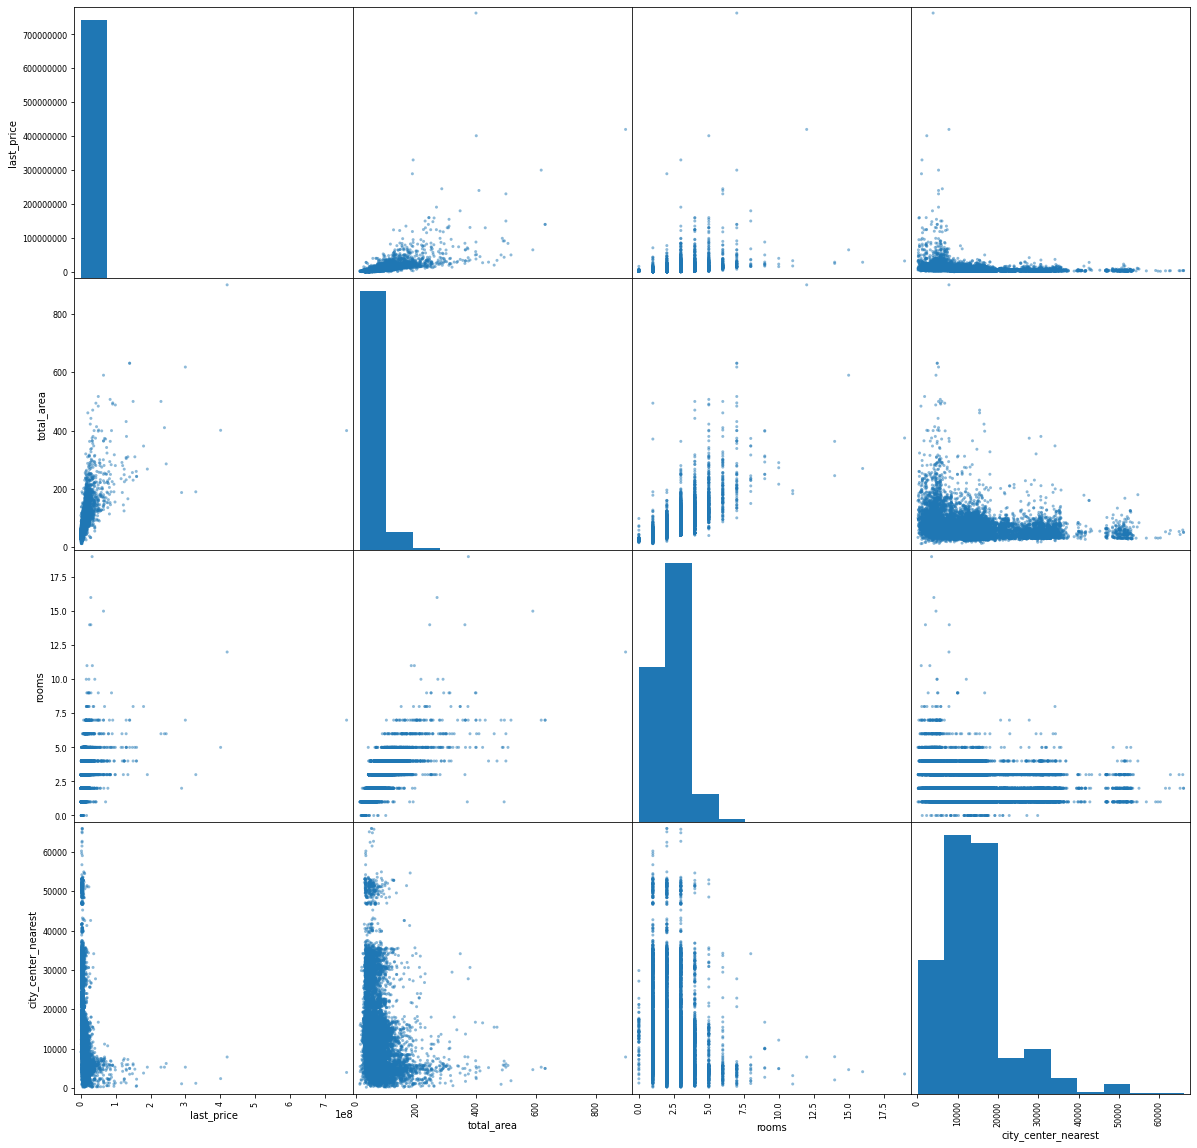

In [100]:
ddf = df[['last_price', 'total_area', 'rooms', 'city_center_nearest']].copy() # формирование вспомогательного датафрейма
pd.plotting.scatter_matrix(ddf, figsize=(20, 20)) # построение матрицы диаграмм рассеяния

Предварительно можно сделать вывод, что зависимость стоимости квартиры от общей площади, числа комнати удаленности от центра присутствует. Стоимости квартир достаточно равномерно растут с увеличение площади, однако где-то после 300 кв.м. начинается достаточно сильный разброс по стоимости, зависимость близка к линейной. Зависимость стоимости от количества комнат похожа на нормальное распределение, больше всего дорогих квартир с 4 и 5 комнатами. Зависимость стоимости от удаленности от центра достаточно неоднородна, есть большая группа дорогих квартир, находящихся достаточно близко к центру, но все-таки стоимость большинства квартир не сильно зависят от удаленности. Более точно взаимосвязь данных нам могут показать коэффициенты корреляции.

In [101]:
ddf.corr() # вывод коэффициентов корреляции

,last_price,total_area,rooms,city_center_nearest
last_price,1.000000,0.653709,0.364044,-0.206711
total_area,0.653709,1.000000,0.759125,-0.231378
rooms,0.364044,0.759125,1.000000,-0.185300
city_center_nearest,-0.206711,-0.231378,-0.185300,1.000000


Значения коэффициентов корреляции в первом столбце показывают, что ощутимой взаимосвязи между показателями не прослеживается. Это может означать, что продавцы выставляют цены на квартиры, руководствуясь другими факторами.

Изучим зависимость стоимости квартиры от этажа. Для этого сгруппируем датафрейм по столбцу `floor_type` с медианными значениями стоимости.

In [102]:
df.groupby('floor_type')['last_price'].median() # группировка датафрейма по столбцу 'floor_type'

floor_type
другой       4850000.0
первый       3900000.0
последний    4350000.0
Name: last_price, dtype: float64

По результатам группировки видно, что наибольшей стоимостью обладают квартиры расположенные не на первом и не на последнем этаже, квартиры на первом этаже традиционно самые дешевые.

Изучим зависимость стоимости квартиры от даты размещения объявления. Для этого сгруппируем датафрейм по столбцу `weekday_exposition` с медианными значениями стоимости.

In [103]:
df.groupby('weekday_exposition')['last_price'].median() # группировка датафрейма по столбцу 'weekday_exposition'

weekday_exposition
0    4650000.0
1    4730000.0
2    4700000.0
3    4650000.0
4    4585000.0
5    4560000.0
6    4550000.0
Name: last_price, dtype: float64

По результатам группировки видно, что разница в стоимости квартир, размещенных в разные дни недели несущественна. Более дорогие квартиры размещают по вторникам, средам. Объявления с дешевыми квартирами размещают в выходные.

In [104]:
df.groupby('month_exposition')['last_price'].median() # группировка датафрейма по столбцу 'month_exposition'

month_exposition
1     4600000.0
2     4650000.0
3     4650000.0
4     4800000.0
5     4500000.0
6     4400000.0
7     4650000.0
8     4570000.0
9     4700000.0
10    4570000.0
11    4700000.0
12    4700000.0
Name: last_price, dtype: float64

По результатам группировки видно, что разница в стоимости квартир, размещенных в разные месяцы также несущественна. Более дорогие квартиры размещают в апреле, сентябре, ноябре и декабре. Объявления с дешевыми квартирами размещают в мае и январе.

In [105]:
df.groupby('year_exposition')['last_price'].median() # группировка датафрейма по столбцу 'year_exposition'

year_exposition
2014    7700000.0
2015    5350000.0
2016    4550000.0
2017    4500000.0
2018    4550000.0
2019    5050000.0
Name: last_price, dtype: float64

По результатам группировки видно, что пик размещения дорогих квартир пришелся на 2014 год. Объявления с дешевыми квартирами размещены в 2016-2018 годах.

По результатам изучения можно сделать выводы, что стоимость квартир ощутимо зависит от типа этажа. С остальными параметрами (общей площади, числа комнат, удаленности от центра, даты размещения объявления) не всё так однозначно. Это показывает, что рынок недвижимости достаточно живой и предложения могут быть самые разнообразные в независимости от конкретных параметров объекта. На практике еще учитываются как минимум такие параметры, как конкретный район расположения, возраст дома, тип дома, наличие ремонта.

### Изучение 10 населенных пунктов с наибольшим числом объявлений

Попробуем определить 10 населенных пунктов с наибольшим числом объявлений. 

In [106]:
df['locality_name'].value_counts().head(10) # вывод 10 населенных пунктов с наибольшим числом объявлений

Санкт-Петербург      15759
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 371
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Мы получили топ 10 населенных пунктов с наибольшим числом объявлений. Ожидаемо список возглавил Санкт-Петербург.

Посчитаем среднюю цену квадратного метра в этих населенных пунктах. Для этого сформируем таблицу

In [107]:
(df.pivot_table(index='locality_name', aggfunc={'locality_name': len, 'sq_m_price': np.mean,}) # формирование таблицы
 .rename(columns={'locality_name':'count', 'sq_m_price':'mean_sq_m_price'}) # переименование столбцов
 .sort_values('count', ascending=False) # сортировка значений по убыванию
 .round(2) # округление
 .head(10)) # выведение первых 10 строк

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,15759,114817.71
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,371,102915.06
Колпино,338,75424.58
поселок Парголово,327,90175.91
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


Определим местоположение самой дорогой и самой дешевой квартиры.

In [108]:
df.loc[df['last_price'] == df['last_price'].max(), 'locality_name'] # определение местоположения самой дорогой квартиры

12970    Санкт-Петербург
Name: locality_name, dtype: object

In [109]:
df.loc[df['last_price'] == df['last_price'].min(), 'locality_name'] # определение местоположения самой дешевой квартиры

8792    Санкт-Петербург
Name: locality_name, dtype: object

Обе квартиры находятся в Санкт-Петербурге.

### Изучение зависимости стоимости квартиры от фактора удаленности от центра

Изучим зависимость средней стоимости квартиры в Санкт-Петербурге от удаленности от центра. Для начала добавим в исходный датафрейм столбец `c_c_km` с информацией о расстоянии до центра города.

In [110]:
df['c_c_km'] = round(df.loc[df['locality_name'] == 'Санкт-Петербург', 'city_center_nearest'] / 1000) # добавление столбца в датафрейм
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_ratio,kitchen_ratio,c_c_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,0.46,0.27,NaN
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.28,0.06,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41,8.0


Сформируем вспомогательный датафрейм `kmf` из сводной таблицы исходного датафрейма и построим график зависимости средней стоимости квартиры от удаленности от центра города.

In [111]:
kmf = (df.loc[df['locality_name'] == 'Санкт-Петербург'] # формирование вспомогательного датафрейма
       .pivot_table(index='c_c_km', aggfunc={'sq_m_price': np.mean,}) # формирование сводной таблицы
       .rename(columns={'sq_m_price':'mean_sq_m_price'}) # переименование столбцов
       .round(2)) # округление

<AxesSubplot:xlabel='city_center_distance_in_km'>

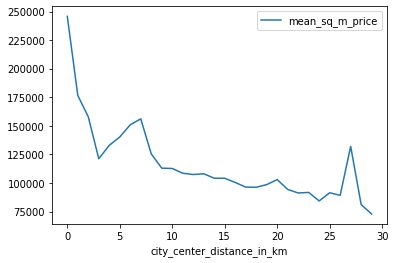

In [112]:
kmf.plot(xlabel='city_center_distance_in_km') # построение графика

Построим график в диапазоне от 0 до 10 км.

<AxesSubplot:xlabel='city_center_distance_in_km'>

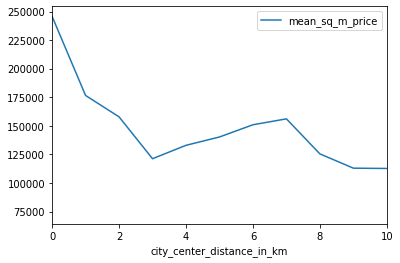

In [113]:
kmf.plot(xlabel='city_center_distance_in_km', xlim=(0, 10)) # построение графика

График зависимости стоимости от удаленности от центра города имеет характерную особенность.Значения практически равномерно падают до значения 3 км, но есть еще пик на 7 км. Можно сделать вывод, что 'центр города' имеет радиус в 7 км.

Изучим характерные особенности и взаимосвязи. Для начала изучим `площадь квартир`, построим гистограмму, диаграмму размаха и выведем характерные значения по выборке и по всему датафрейму.

<AxesSubplot:>

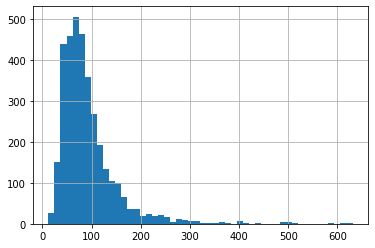

In [114]:
df.query('c_c_km > 0 and c_c_km <= 7')['total_area'].hist(bins=50) # построение гистограммы площади квартир

(0.0, 200.0)

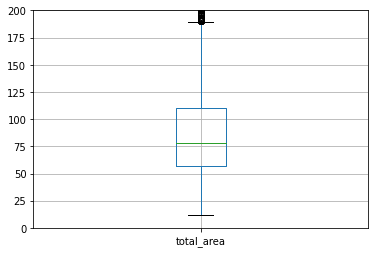

In [115]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='total_area') # построение диаграммы размаха
plt.ylim(0, 200) # изменение масштаба вертикальной оси

In [116]:
df.query('c_c_km > 0 and c_c_km <= 7')['total_area'].describe() # вывод характерных значений выборки по центру города

count    3514.000000
mean       92.945435
std        59.379594
min        12.000000
25%        56.900000
50%        78.400000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

In [117]:
df['total_area'].describe() # вывод характерных значений выборки по всему датафрейму

count    23691.000000
mean        60.346202
std         35.658589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Минимальное значение площади составляет 12 кв.м., максимальное 631.2 кв.м, среднее значение 92.95 кв.м., медианное 78.4 кв.м. Стандартное отклонение имеет достаточно большую величину, это говорит о том, в распределении данных имеются выбросы, начиная со значения в 190 кв.м. В данном конкретном случае, это означает, что в центре города достаточно распространены квартиры с большой площадью, средняя площадь квартир в центре больше, самая маленькая квартира тоже находится в центре. 

Изучим `стоимость квартир`.

<AxesSubplot:>

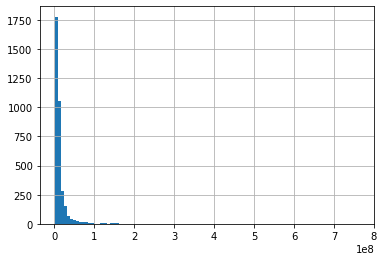

In [118]:
df.query('c_c_km > 0 and c_c_km <= 7')['last_price'].hist(bins=100) # построение гистограммы стоимости квартир

Мы видим, что распределение имеет достаточно сильный выброс в сторону больших значений. Построим диаграмму размаха и выведем характерные значения по выборке и по всему датафрейму.

(0.0, 30000000.0)

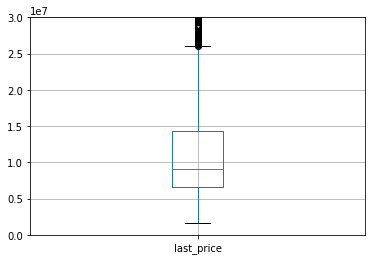

In [119]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='last_price') # построение диаграммы размаха
plt.ylim(0, 30000000) # изменение масштаба вертикальной оси

In [120]:
df.query('c_c_km > 0 and c_c_km <= 7')['last_price'].describe() # вывод характерных значений по центру города

count    3.514000e+03
mean     1.474474e+07
std      2.414781e+07
min      1.600000e+06
25%      6.650000e+06
50%      9.160000e+06
75%      1.440000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [121]:
df['last_price'].describe() # вывод характерных значений выборки по всему датафрейму

count    2.369100e+04
mean     6.542278e+06
std      1.088874e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальное значение стоимости составляет 1.6 млн., максимальное 7.63 млрд., среднее значение 14.74 млн., медианное 9.16 млн. Стандартное отклонение имеет достаточно большую величину, это говорит о том, в распределении данных имеются выбросы, начиная со значения в 26 млн. В данном конкретном случае, это означает, что в центре города достаточно распространены квартиры с большой стоимостью, средняя стоимость квартир в центре сильно выше. 

Изучим `количество комнат`.

<AxesSubplot:>

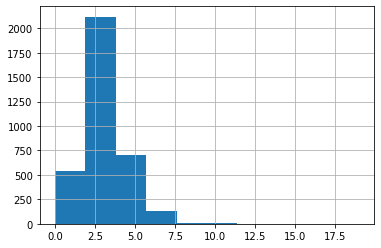

In [122]:
df.query('c_c_km > 0 and c_c_km <= 7')['rooms'].hist() # построение гистограммы количества комнат

Имеются небольшие выбросы в сторону больших значений. Построим диаграмму размаха и выведем характерные значения по выборке и по всему датафрейму.

<AxesSubplot:>

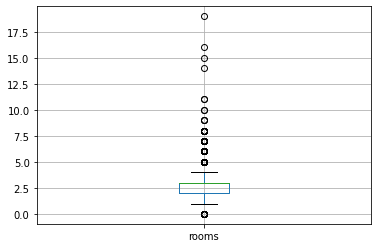

In [123]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='rooms') # построение диаграммы размаха

In [124]:
df.query('c_c_km > 0 and c_c_km <= 7')['rooms'].describe() # вывод характерных значений по центру города

count    3514.000000
mean        2.834092
std         1.446284
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [125]:
df['rooms'].describe() # вывод характерных значений выборки по всему датафрейму

count    23691.000000
mean         2.073108
std          1.074855
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Минимальное значение количества комнат составляет 0, максимальное 19, среднее значение 2.8, медианное 3. Стандартное отклонение имеет небольшую величину, это говорит о том, распределение данных близко к нормальному. Среднее количество комнат в центре города выше, больше распространены 2-х и 3-х комнатные квартиры. Квартира с наибольшим количеством комнат находится в центре города.

Изучим `высоту потолков`.

<AxesSubplot:>

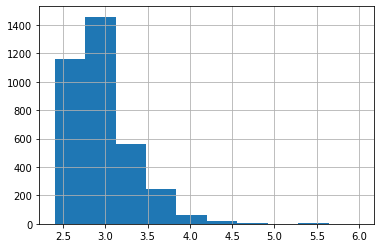

In [126]:
df.query('c_c_km > 0 and c_c_km <= 7')['ceiling_height'].hist() # построение гистограммы высоты потолков

Имеются небольшие выбросы в сторону больших значений. Построим диаграмму размаха и выведем характерные значения по выборке и по всему датафрейму.

<AxesSubplot:>

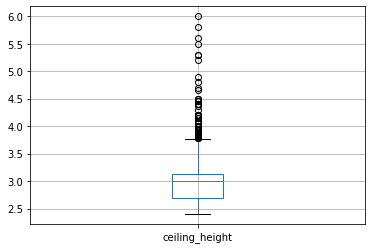

In [127]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='ceiling_height') # построение диаграммы размаха
#plt.ylim(0, 30000000) # изменение масштаба вертикальной оси

In [128]:
df.query('c_c_km > 0 and c_c_km <= 7')['ceiling_height'].describe() # вывод характерных значений по центру города

count    3514.000000
mean        2.973196
std         0.363487
min         2.400000
25%         2.700000
50%         3.000000
75%         3.130000
max         6.000000
Name: ceiling_height, dtype: float64

In [129]:
df['ceiling_height'].describe() # вывод характерных значений выборки по всему датафрейму

count    23691.000000
mean         2.708861
std          0.245626
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолка составляет 2.4 м., максимальное 6, среднее значение 2.97, медианное 3. Стандартное отклонение имеет небольшую величину, это говорит о том, распределение данных близко к нормальному. Средняя высота потолка в центре города выше, больше распространены квартиры с высокими потолками.

Выделим факторы, влияющие на стоимость квартир в центре. Для начала посмотрим зависимость стоимости от количества комнат. Сгруппируем срез исходного датафрейма по количеству комнат с медианной стоимостью квартир и построим график.

<AxesSubplot:xlabel='rooms'>

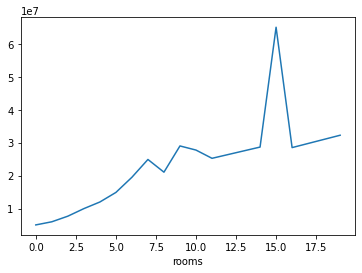

In [130]:
(df.query('c_c_km > 0 and c_c_km <= 7') 
 .groupby('rooms')['last_price'] # группировка среза по количеству комнат
 .median() # расчет медианных значений
 .plot()) # построение графика

Мы видим, что стоимость квартир в центре города увеличивается в зависимости от количества комнат, однако есть скачки стоимости 6-ти и 9-ти комнатных квартир, а также резкий скачок стоимости 15-ти комнатных квартир.

Приступим к изучению зависимости стоимости квартир в центре города от типа этажа. Сгруппируем срез исходного датафрейма по типу этажа с медианной стоимостью квартир.

In [131]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('floor_type')['last_price'].median() # группировка среза по типу этажа

floor_type
другой       9530000.0
первый       6649500.0
последний    9350000.0
Name: last_price, dtype: float64

Самые дешевые квартиры в центре расположены традиционно на первом этаже. Самые дорогие находятся не на первом и не на последнем этаже. Это не отличается от данных по всему датафрейму.

Изучим зависимость стоимости квартир от расстояния до центра города. Построим диаграмму рассеяния.

<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

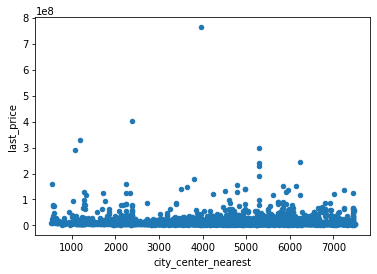

In [132]:
df.query('c_c_km > 0 and c_c_km <= 7').plot(x='city_center_nearest', y='last_price', kind='scatter') # построение диаграммы рассеяния

Четкая взаимосвязь между стоимостью квартир и удаленностью от центра в центре города не прослеживается, имеются дорогие объекты, равно как и близко к центру, так и на расстоянии от него.

Посмотрим на взаимосвязь стоимости от даты размещения объявления. Сгруппируем срез датафрейма по дню недели, месяцу и году размещения с медианной стоимостью.

In [133]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('weekday_exposition')['last_price'].median() # группировка среза по дню недели размещения

weekday_exposition
0    9300000.0
1    9000000.0
2    9370000.0
3    9300000.0
4    9000000.0
5    8594500.0
6    9400000.0
Name: last_price, dtype: float64

In [134]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('month_exposition')['last_price'].median() # группировка среза по месяцу размещения

month_exposition
1     9900000.0
2     9500000.0
3     9400000.0
4     9000000.0
5     8900000.0
6     8820000.0
7     9200000.0
8     8970000.0
9     9525760.0
10    8700000.0
11    9500000.0
12    8510000.0
Name: last_price, dtype: float64

In [135]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('year_exposition')['last_price'].median() # группировка среза по году размещения

year_exposition
2014    18345000.0
2015    10090000.0
2016     9495000.0
2017     9000000.0
2018     8800000.0
2019     9400000.0
Name: last_price, dtype: float64

Можно заметить, что наиболее дорогие квартиры размещены в среду, воскресенье, в январе, сентябре, в 2014 и 2015 годах. Самые дешевые в субботу, в октябре, декабре, в 2018 году.

### Вывод

Изучив данные мы обнаружили интересные закономерности. Для данных по площадям и стоимостям квартир характерны выбросы в сторону больших значений. То есть в продаже часто встречаются очень большие и очень дорогие квартиры. Для высоты потолка и количества комнат характерны нормальные распределения данных, это означает, что большинство объявлений - со средними величинами (это 2,3-х комнатные квартиры и высота потолка в 2.7-2.75 м.). Посмотрели время продажи квартир, определили характерные значения. Выяснили, что часть объявлений экспонируются в течении долгого времени(некоторое квартиры находятся на продаже на протяжении 3-4 лет), основная масса квартир продается в течении 3-х месяцев. 

## Общий вывод

Основной задачей исследования являлось исследование рынка жилой недвижимости Санкт-Петербурга. Изучив данные мы определили аномалии в них, по возможности заполнили пропуски. В ходе исследования определили основные факторы, влиящию на стоимость квартир. Стоимости квартир достаточно равномерно растут с увеличение площади. Больше всего дорогих квартир с 4 и 5 комнатами. Зависимость стоимости от удаленности от центра достаточно неоднородна, есть большая группа дорогих квартир, находящихся достаточно близко к центру, но все-таки стоимость большинства квартир не сильно зависят от удаленности. Определены дни недели, месяцы и года, в которые были опубликованы объявления с наибольшей стоимостью. Также в ходе исследования определили топ-10 населенных пунктов с наибольшим количеством объявлений, определили местоположение самой дорогой и самой дешевой квартиры. Дополнительно был проведен анализ с целью определения района центра города и изучены основные показатели. Сделаны выводы по основным параметрам и определены отличия от всей выборки.